In [494]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
import numpy as np
# import sympy as sp
import os
import sys
sys.path.append(f"C:\\Users\\maurovlachus\\OneDrive - Technical University of Cluj-Napoca\\utcn\\master\\caa\\proiect\\p1_opamps\\ekvParameterExtraction\\ekvExtractionScripts")
from siUnits import *
# import scipy as sp
# import latexify

In [495]:
# @latexify.function
# def ekv(VG, Is, Vth0, k, theta, W, L):
#         VT = 0.0258
#         return Is*(W/L)*(1/(1+theta*k*(VG-Vth0)))*(np.log(1 + np.exp(k * (VG - Vth0) / (2 * VT))))**2

# ekv

#Write ekv function in latex

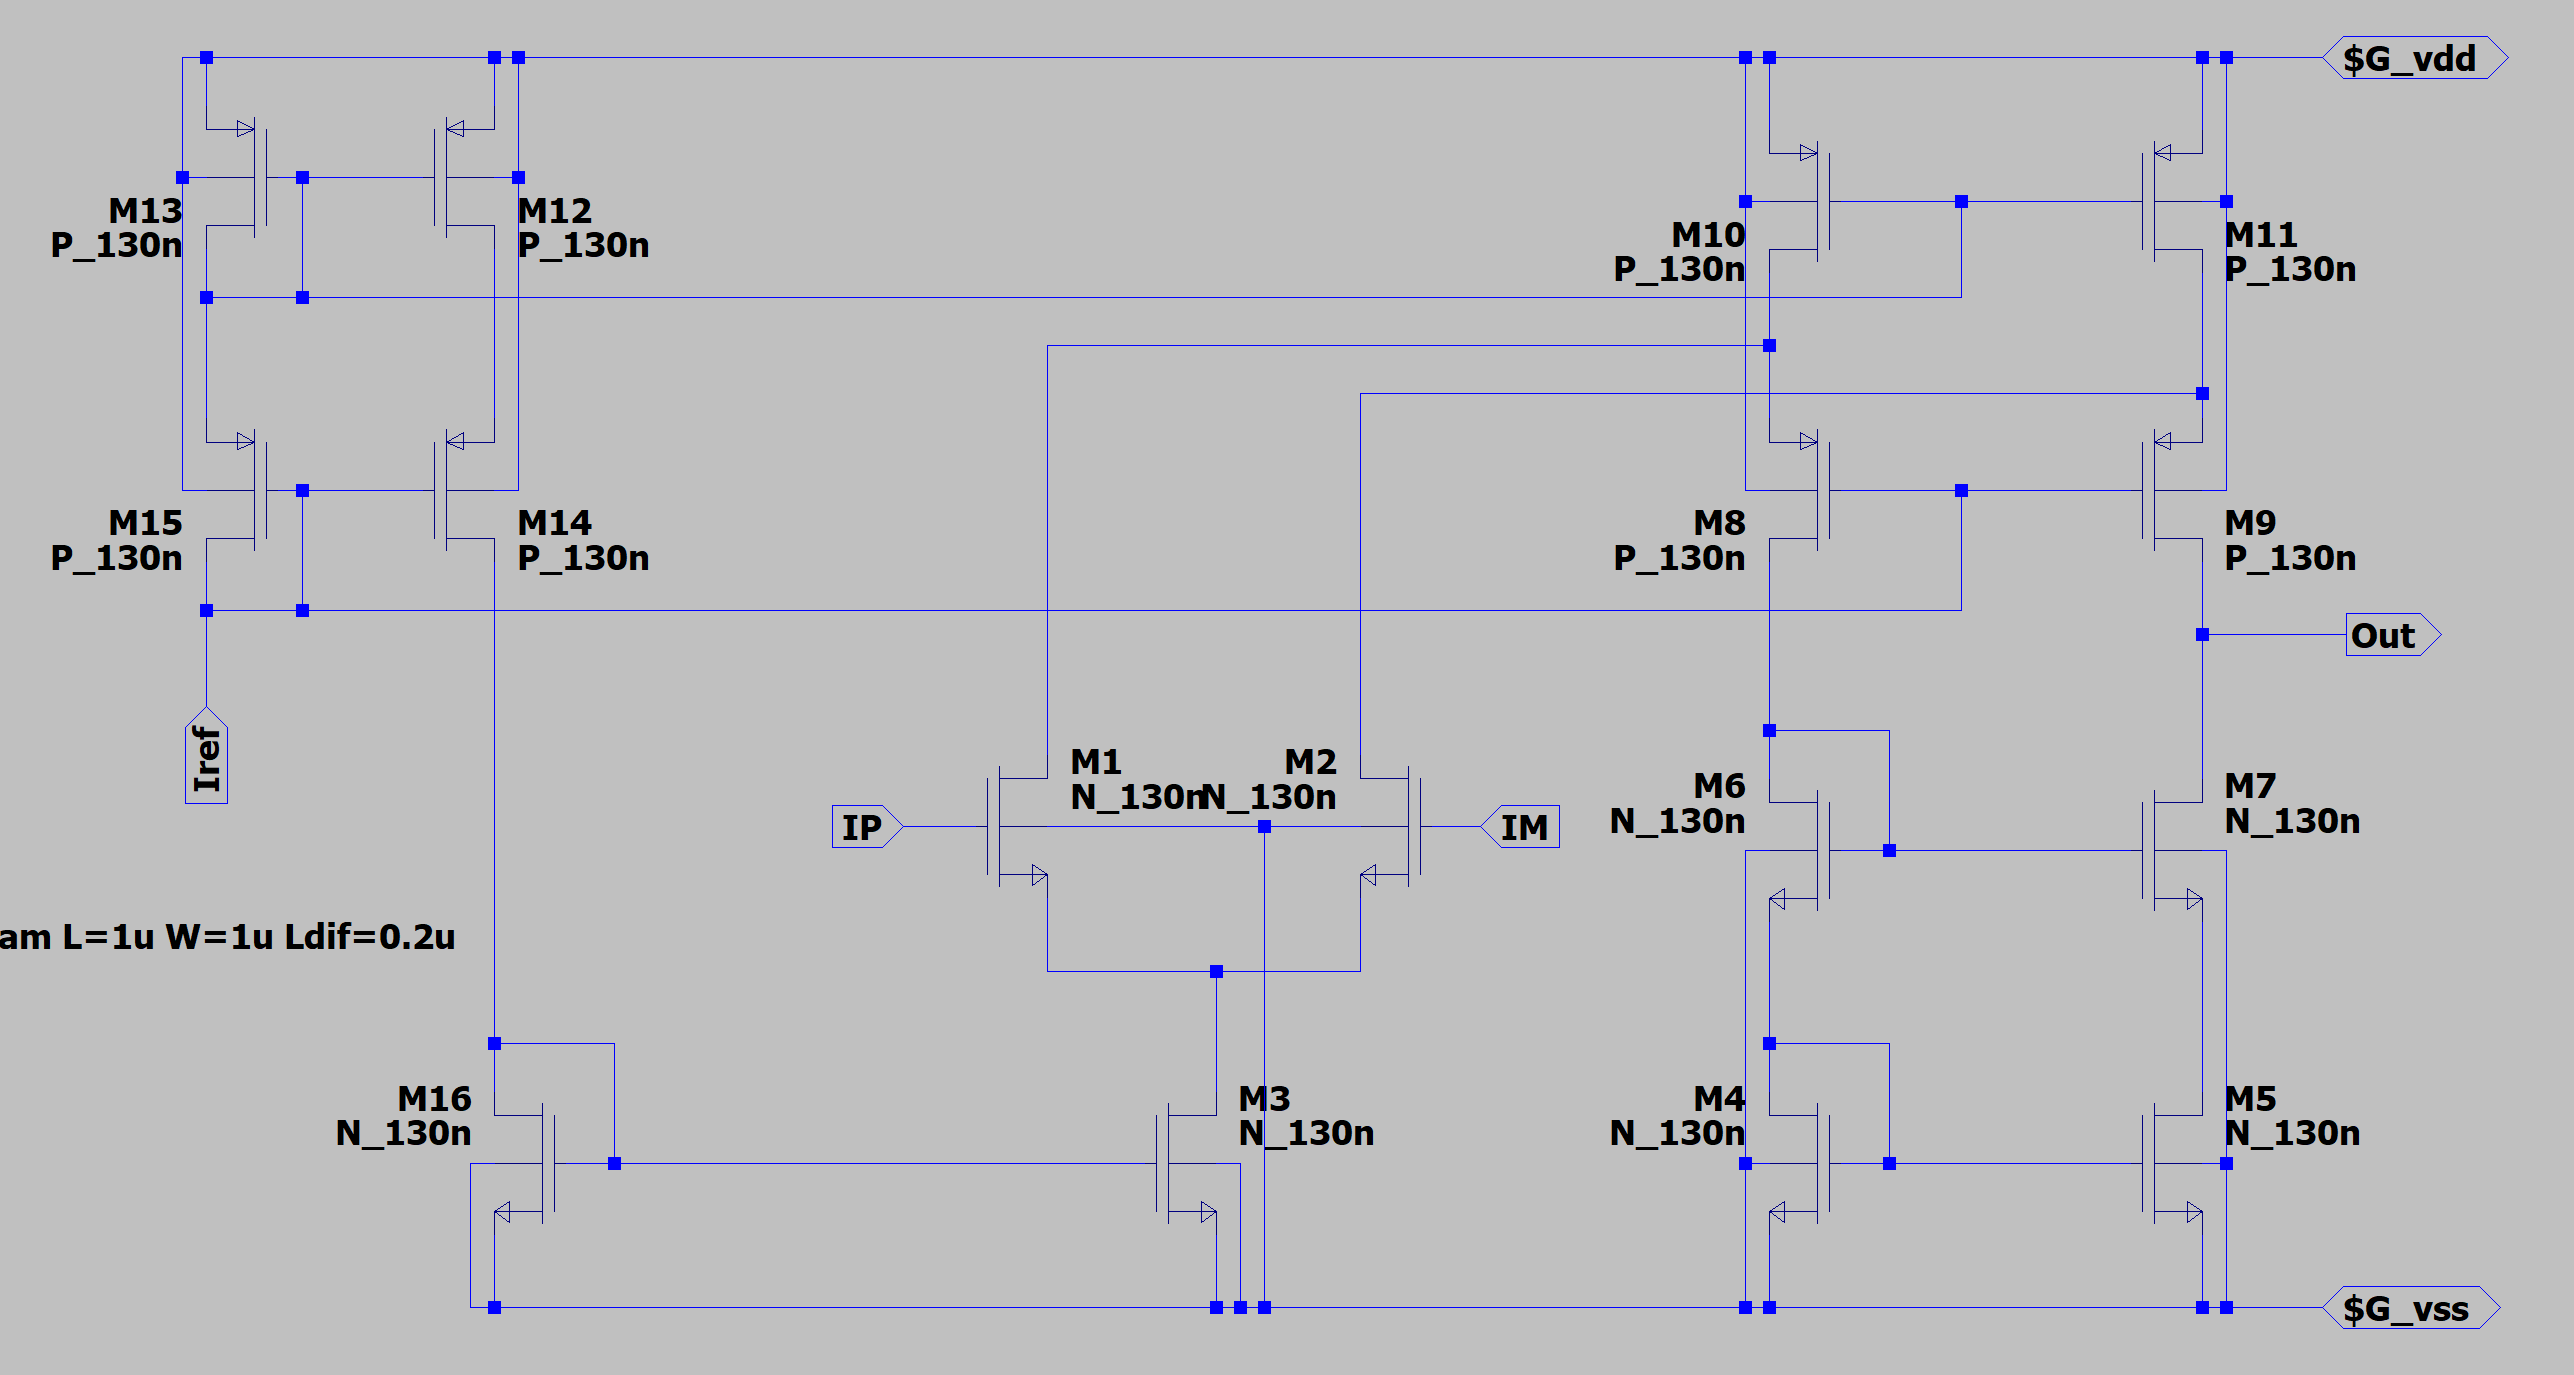

$I_{D} = I_Sln^2[1+exp(\frac{V_G-V_{Th0}}{2nV_T})] = 2 \mu C_{ox}nV_T^2\frac{W}{L}ln^2[1+exp(\frac{V_G-V_{Th0}}{2nV_T})]$

$I_S = 689 nA, V_{Th0}: 387 mV, \kappa: 0.822$

VG = [0, 1]
Is: 727nA, VTh0: 400mV, kappa: 0.816

$I_S = 2 \mu C_{ox}nV_T^2\frac{W}{L} = \frac{2 \mu C_{ox}V_T^2\frac{W}{L}}{\kappa}$

<!-- $\frac{W}{L} = \frac{\kappa I_S}{\mu C_{ox}V_T^2}$ -->

$  \frac{2\mu C_{ox}V_T^2}{\kappa} = \frac{I_S}{W/L}$

$\mu C_{ox} = \frac{I_S \kappa}{2(W/L)V_T^2}$

In [496]:
W_L = 2         #W/L was 2u/1u for the reference transistors 
VT = 0.0258

Is_n = siString2Num("689n")
Vth0_n = siString2Num("387m")
k_n = 0.822
n_n = 1/k_n
uCox_n = (Is_n*k_n)/(2*2*VT**2)
u_n = 1.343e-2
lambdac_n = 0.04



Is_p = siString2Num("904.8n")
Vth0_p = siString2Num("371m")
k_p = 0.816
n_p = 1/k_p
uCox_p = (Is_p*k_p)/(2*2*VT**2)
u_p = 5.2e-3
lambdac_n = 0.02

In [497]:
# Mosfet Class
class designedMosfet:
    def __init__(self, name, W, L, type):
        self.name = name
        self.type = type
        self.W = W
        self.L = L
        

class designedMosfetList(list):
    def getMos(self, target_name):
        """Finds a MOSFET in the list by name."""
        for mosfet in self:
            if mosfet.name == target_name:
                return mosfet            
        raise KeyError(f"MOSFET {target_name} not found in the list")
        return None
    
    def append(self, item):
        if not isinstance(item, designedMosfet):
            raise TypeError("Only MOSFET objects can be added to MOSFETList")
        super().append(item)

    def extend(self, iterable):
        for item in iterable:
            if not isinstance(item, designedMosfet):
                raise TypeError("Only MOSFET objects can be added to MOSFETList")
        super().extend(iterable)

## Specificatii
|Tip OTA |Gain |GBW | C_L| VDD | VSS | IQ |
|---|---|---|---|---|---|---|
FC NMOS |70dB | 40 MHz | 5pF | 1.65| -1.65| 100uA|

In [498]:
gbw = siString2Num("40M")
gain = 10**(70/20)              # 70dB to linear
C_L = siString2Num("5p")
VDD = 1.65
VSS = -1.65
IQ = siString2Num("100u")

$gm_1 = 2\pi GBW C_L$

In [499]:
gm1 = 2*math.pi * gbw * C_L
print(f"gm1,2 = {num2SiStringRounded(gm1)}S")

gm1,2 = 1.257mS


$gm = \frac{I_D}{nV_T}\cdot \frac{1-exp(-\sqrt{IC})}{\sqrt{IC}} = \frac{kI_D}{V_T}\cdot \frac{1-exp(-\sqrt{IC})}{\sqrt{IC}}$

$IC = \frac{I_D}{I_S} = \frac{I_D}{2 \mu C_{ox}nV_T^2\frac{W}{L}}$ = coeficientul de inversie

$I_D = \frac{gmV_T\sqrt{IC}}{\kappa[1-exp(-\sqrt{IC})]}$

In [500]:
# gm, Id, k, IC, VT = sp.symbols('gm Id k IC VT')
# eq = gm - k*Id/VT*(1-sp.exp(-IC))/sp.sqrt(IC)
# sol = sp.solve(eq, IC)

In [501]:
IC = 0.8
ID = (gm1*VT*np.sqrt(IC))/(k_n*(1-np.exp(-np.sqrt(IC))))
print(f"ID = {num2SiStringRounded(ID)}A")
IBiasDiffPair = 2*ID

ID = 59.676uA


$\frac{W}{L} = \frac{I_D}{2 \mu C_{ox}nV_T^2IC}$

In [502]:
def getDimensions(IC, ID, mostype):
    if mostype == "n":
        return (ID)/(2*uCox_n*n_n*VT**2*IC)
    elif mostype == "p":
        return (ID)/(2*uCox_p*n_p*VT**2*IC)
    else:
        raise ValueError("mostype has to be either \"n\" or \"p\"")

# W_L = (ID)/(2*uCox*n*VT**2*IC)
W_L1 = getDimensions(IC, ID, "n")
L = siString2Num("130n")
W = W_L1*L
# print(W)
print(f"W/L_1,2 = {num2SiStringRounded(W)}/{num2SiStringRounded(L)}")
designedMosfets = designedMosfetList()
designedMosfets.append(designedMosfet("M1", W, L, "n"))
designedMosfets.append(designedMosfet("M2", W, L, "n"))
print(f"input pair: {designedMosfets[0].name}, {num2SiStringRounded(designedMosfets[0].W)}, {num2SiStringRounded(designedMosfets[0].L)}")
print(f"input pair: {designedMosfets[0].name}, {num2SiStringRounded(designedMosfets.getMos("M1").W)}, {num2SiStringRounded(designedMosfets.getMos("M1").L)}")


W/L_1,2 = 28.149u/130.0n
input pair: M1, 28.149u, 130.0n
input pair: M1, 28.149u, 130.0n


$f_t = \frac{\mu V_T}{2\pi L^2}\cdot(\sqrt{1+IC}-1)$

In [503]:
ft = (u_n*VT)/(2*np.pi*L**2)*(np.sqrt(1+IC)-1)
print(f"ft = {num2SiStringRounded(ft)}Hz")
if ft < gbw:
    print(f"ft < gbw = {num2SiStringRounded(gbw)}Hz")
else:
    print(f"ft > gbw = {num2SiStringRounded(gbw)}Hz")

ft = 1.115GHz
ft > gbw = 40.0MHz


## M10, M11 Dimensioning
$I_{DS\_10,11} > I_{Bias\_DiffPair}$

In [504]:
I10_11 = 1.2*IBiasDiffPair
print(f"ID_10,11 = {num2SiStringRounded(I10_11)}")
IC_10 = 20      # strong inversion
W_L_10_11 = getDimensions(IC, I10_11, "p")
L = siString2Num("1u")
W = W_L_10_11 * L
designedMosfets.append(designedMosfet("M10", W, L, "p"))
designedMosfets.append(designedMosfet("M11", W, L, "p"))
# print(f"W/L_10,11 = {num2SiStringRounded(W)}/{num2SiStringRounded(L)}")
print(f"W/L_10,11= {designedMosfets[0].name}, {num2SiStringRounded(designedMosfets.getMos("M10").W)}/{num2SiStringRounded(designedMosfets.getMos("M11").L)}")

def getVDSat(IC):
    return VT*(np.sqrt(1+IC)-1 + 4)
VDSat = getVDSat(IC_10)
print(f"VDSat_10,11 = {num2SiStringRounded(VDSat)}")


ID_10,11 = 143.222u
W/L_10,11= M1, 395.729u/1.0u
VDSat_10,11 = 195.63m


In [505]:
ft = (u_p*VT)/(2*np.pi*L**2)*(np.sqrt(1+IC_10)-1)
print(f"ft = {num2SiStringRounded(ft)}Hz")
if ft < gbw:
    print(f"ft < gbw = {num2SiStringRounded(gbw)}Hz")
else:
    print(f"ft > gbw = {num2SiStringRounded(gbw)}Hz")

ft = 76.496MHz
ft > gbw = 40.0MHz


## M4, M5 Dimensioning

$I_{DS\_4,4} = I_{DS\_10,11} - I_{Bias\_DiffPair}/2$

In [506]:
I4_5 = I10_11 -IBiasDiffPair/2
print(f"IDS_4,5 = {num2SiStringRounded(I4_5)}")
IC = 20      # strong inversion
W_L_4_5 = getDimensions(IC, I10_11, "n")
L = siString2Num("1u")
W = W_L_4_5 * L
designedMosfets.append(designedMosfet("M4", W, L, "n"))
designedMosfets.append(designedMosfet("M5", W, L, "n"))
# print(f"W/L_4,5 = {num2SiStringRounded(W)}/{num2SiStringRounded(L)}")
print(f"W/L_4,5= {designedMosfets[0].name}, {num2SiStringRounded(designedMosfets.getMos("M4").W)}/{num2SiStringRounded(designedMosfets.getMos("M5").L)}")
print(f"VDSat_4,5 = {num2SiStringRounded(getVDSat(IC))}")

IDS_4,5 = 83.546u
W/L_4,5= M1, 20.787u/1.0u
VDSat_4,5 = 195.63m


In [507]:
ft = (u_n*VT)/(2*np.pi*L**2)*(np.sqrt(1+IC)-1)
print(f"ft = {num2SiStringRounded(ft)}Hz")
if ft < gbw:
    print(f"ft < gbw = {num2SiStringRounded(gbw)}Hz")
else:
    print(f"ft > gbw = {num2SiStringRounded(gbw)}Hz")

ft = 197.566MHz
ft > gbw = 40.0MHz


## M6, M7 Dimensioning
$I_{DS\_6,7} = I_{DS\_10,11} - I_{Bias\_DiffPair}/2$

In [508]:
I6_7 = I10_11 - IBiasDiffPair/2
print(f"IDS_6,7 = {num2SiStringRounded(I6_7)}")
IC = 10      # strong inversion
W_L_6_7 = getDimensions(IC, I6_7, "n")
L = siString2Num("130n")
W = W_L_6_7 * L
designedMosfets.append(designedMosfet("M6", W, L, "n"))
designedMosfets.append(designedMosfet("M7", W, L, "n"))
# print(f"W/L_6,7 = {num2SiStringRounded(W)}/{num2SiStringRounded(L)}")
print(f"W/L_6,7= {designedMosfets[0].name}, {num2SiStringRounded(designedMosfets.getMos("M6").W)}/{num2SiStringRounded(designedMosfets.getMos("M7").L)}")
print(f"VDSat_6,7 = {num2SiStringRounded(getVDSat(IC))}")


IDS_6,7 = 83.546u
W/L_6,7= M1, 3.153u/130.0n
VDSat_6,7 = 162.969m


In [509]:
ft = (u_n*VT)/(2*np.pi*L**2)*(np.sqrt(1+IC)-1)
print(f"ft = {num2SiStringRounded(ft)}Hz")
if ft < gbw:
    print(f"ft < gbw = {num2SiStringRounded(gbw)}Hz")
else:
    print(f"ft > gbw = {num2SiStringRounded(gbw)}Hz")

ft = 7.559GHz
ft > gbw = 40.0MHz


## M8, M9 Dimensioning
$I_{DS\_8,9} = I_{DS\_10,11} - I_{Bias\_DiffPair}/2$

In [510]:
I8_9 = I10_11 - IBiasDiffPair/2
print(f"IDS_8,9 = {num2SiStringRounded(I8_9)}")
IC = 10      # strong inversion
W_L_8_9 = getDimensions(IC, I8_9, "p")
L = siString2Num("130n")
W = W_L_8_9 * L
print(f"W/L_8,9 = {num2SiStringRounded(W)}/{num2SiStringRounded(L)}")
print(f"VDSat_6,7 = {num2SiStringRounded(getVDSat(IC))}")
designedMosfets.append(designedMosfet("M8", W, L, "p"))
designedMosfets.append(designedMosfet("M9", W, L, "p"))


IDS_8,9 = 83.546u
W/L_8,9 = 2.401u/130.0n
VDSat_6,7 = 162.969m


In [511]:
ft = (u_p*VT)/(2*np.pi*L**2)*(np.sqrt(1+IC)-1)
print(f"ft = {num2SiStringRounded(ft)}Hz")
if ft < gbw:
    print(f"ft < gbw = {num2SiStringRounded(gbw)}Hz")
else:
    print(f"ft > gbw = {num2SiStringRounded(gbw)}Hz")

ft = 2.927GHz
ft > gbw = 40.0MHz


## Bias circuit Design

### M18, 19 design

In [512]:
I18_19 = siString2Num("2u")



W18 = siString2Num("4u")
L18 = siString2Num("500n")
designedMosfets.append(designedMosfet("M18", W18, L18, "p"))
W_L_18 = W18/L18


W19 = (I18_19/I10_11)*designedMosfets.getMos("M10").W
# W19 = siString2Num("4u")
L19 = designedMosfets.getMos("M10").L
# L19 = siString2Num("500n")
W_L_19 = W19/L19
designedMosfets.append(designedMosfet("M19", W19, L19, "p"))


VSD10 = Vth0_p +  2*VT*np.log(((np.exp(np.sqrt(I18_19/(Is_p*W_L_18)))-1)*(np.exp(np.sqrt(I18_19/(Is_p*W_L_19)))-1)**n_p)/(np.exp(np.sqrt(I8_9/(Is_p*W_L_8_9)))-1))

# VP_10 = k*(VDD - )
print(f"W/L_18 = {num2SiStringRounded(W18)}/{num2SiStringRounded(L18)}")
print(f"W/L_19 = {num2SiStringRounded(W19)}/{num2SiStringRounded(L19)}")
print(f"VDSat10 = {num2SiStringRounded(getVDSat(IC_10))}")

print(f"VSD10 = {num2SiStringRounded(VSD10)}")

W/L_18 = 4.0u/500.0n
W/L_19 = 5.526u/1.0u
VDSat10 = 195.63m
VSD10 = 234.497m


### M3 Sizing

In [513]:
IC_3 = 20
I3 = IBiasDiffPair
print(f"IDS_3 = {num2SiStringRounded(I3)}")
W_L_3 = getDimensions(IC_3, I3, "n")
L = siString2Num("3u")
W = W_L_3 * L
print(f"W/L_3 = {num2SiStringRounded(W)}/{num2SiStringRounded(L)}")
print(f"VDSat_3 = {num2SiStringRounded(getVDSat(IC_3))}")
designedMosfets.append(designedMosfet("M3", W, L, "n"))


IDS_3 = 119.352u
W/L_3 = 51.967u/3.0u
VDSat_3 = 195.63m


### M12, M13, M14, M15

In [514]:
I12 = I13 = I14 = I15 = siString2Num("20u")
IC_12 = IC_13 = IC_14 = IC_15 = 20
W_L_12 = getDimensions(IC_12, I12, "p")
L_12 = siString2Num("3u")
W_12 = W_L_12 * L
designedMosfets.append(designedMosfet("M12", W_12, L_12, "p"))
print(f"W/L_12 = {num2SiStringRounded(W_12)}/{num2SiStringRounded(L_12)}")
print(f"VDSat_12 = {num2SiStringRounded(getVDSat(IC_12))}")
W_L_13 = getDimensions(IC_13, I13, "p")
L_13 = siString2Num("3u")
W_13 = W_L_13 * L
designedMosfets.append(designedMosfet("M13", W_13, L_13, "p"))
print(f"W/L_13 = {num2SiStringRounded(W_13)}/{num2SiStringRounded(L_13)}")
print(f"VDSat_13 = {num2SiStringRounded(getVDSat(IC_13))}")

W_L_14 = getDimensions(IC_14, I14, "p")
L_14 = siString2Num("3u")
W_14 = W_L_14 * L
designedMosfets.append(designedMosfet("M14", W_14, L_14, "p"))
print(f"W/L_14 = {num2SiStringRounded(W_14)}/{num2SiStringRounded(L_14)}")
print(f"VDSat_14 = {num2SiStringRounded(getVDSat(IC_14))}")

W_L_15 = getDimensions(IC_15, I15, "p")
L_15 = siString2Num("3u")
W_15 = W_L_15 * L
designedMosfets.append(designedMosfet("M15", W_15, L_15, "p"))
print(f"W/L_15 = {num2SiStringRounded(W_15)}/{num2SiStringRounded(L_15)}")
print(f"VDSat_15 = {num2SiStringRounded(getVDSat(IC_15))}")


W/L_12 = 6.631u/3.0u
VDSat_12 = 195.63m
W/L_13 = 6.631u/3.0u
VDSat_13 = 195.63m
W/L_14 = 6.631u/3.0u
VDSat_14 = 195.63m
W/L_15 = 6.631u/3.0u
VDSat_15 = 195.63m


### M16, 17

In [515]:
I16 = I17 = siString2Num("10u")
# IC_16 = IC_17 = 20
# W_L_16 = getDimensions(IC_16, I16, "p")
L_16 = designedMosfets.getMos("M3").L
W_16 = (I16/IBiasDiffPair)*designedMosfets.getMos("M3").W
designedMosfets.append(designedMosfet("M16", W_16, L_16, "n"))

I17 = I18_19
L_17 = L_16
W_17 = (I17/I16)*designedMosfets.getMos("M16").W
designedMosfets.append(designedMosfet("M17", W_17, L_17, "n"))

# designedMosfets.append(designedMosfet("M16", W, L, "p"))
print(f"W/L_16 = {num2SiStringRounded(W_16)}/{num2SiStringRounded(L_16)}")
print(f"W/L_17 = {num2SiStringRounded(W_17)}/{num2SiStringRounded(L_17)}")
# print(f"VDSat_16 = {num2SiStringRounded(getVDSat(IC_16))}")

# for mos in designedMosfets:
#     print(f"{mos.name}")


W/L_16 = 4.354u/3.0u
W/L_17 = 870.827n/3.0u


# Do a design handbook for the folded cascode
# get design equations for the folded cascode; mainly find the small signal parameters: gm, rds, Cgs, Cgd, gmb??
# Write a comparative demonstration between a design following square law equations and one following the ekv model